In [34]:
import pandas
import pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [101]:
new = pandas.read_csv('new2_40.csv')
old = pandas.read_csv('old2_40.csv')

In [137]:
new = pandas.read_csv('new_many_tests.csv')
old = pandas.read_csv('old_many_tests.csv')


In [138]:
new = new.select(lambda x : new['loss'][x] < 2.5)
old = old.select(lambda x : old['loss'][x] < 2.5)

In [139]:
new = new.groupby('n').mean()
old = old.groupby('n').mean()

In [140]:
n_new = new.index#new['n'].get_values()
fm_new = new['flow_mods'].get_values()
pi_new = new['packet_ins'].get_values()
lldp_pi_new = new['lldp_packet_ins'].get_values()
po_new = new['packet_outs'].get_values()
lldp_po_new = new['lldp_packet_outs'].get_values()
fr_new = new['flow_removeds'].get_values()
loss_new = new['loss'].get_values()
time_new = new['time'].get_values()

n_old = old.index#old['n'].get_values()
fm_old = old['flow_mods'].get_values()
pi_old = old['packet_ins'].get_values()
lldp_pi_old = old['lldp_packet_ins'].get_values()
po_old = old['packet_outs'].get_values()
lldp_po_old = old['lldp_packet_outs'].get_values()
fr_old = old['flow_removeds'].get_values()
loss_old = old['loss'].get_values()
time_old = old['time'].get_values()

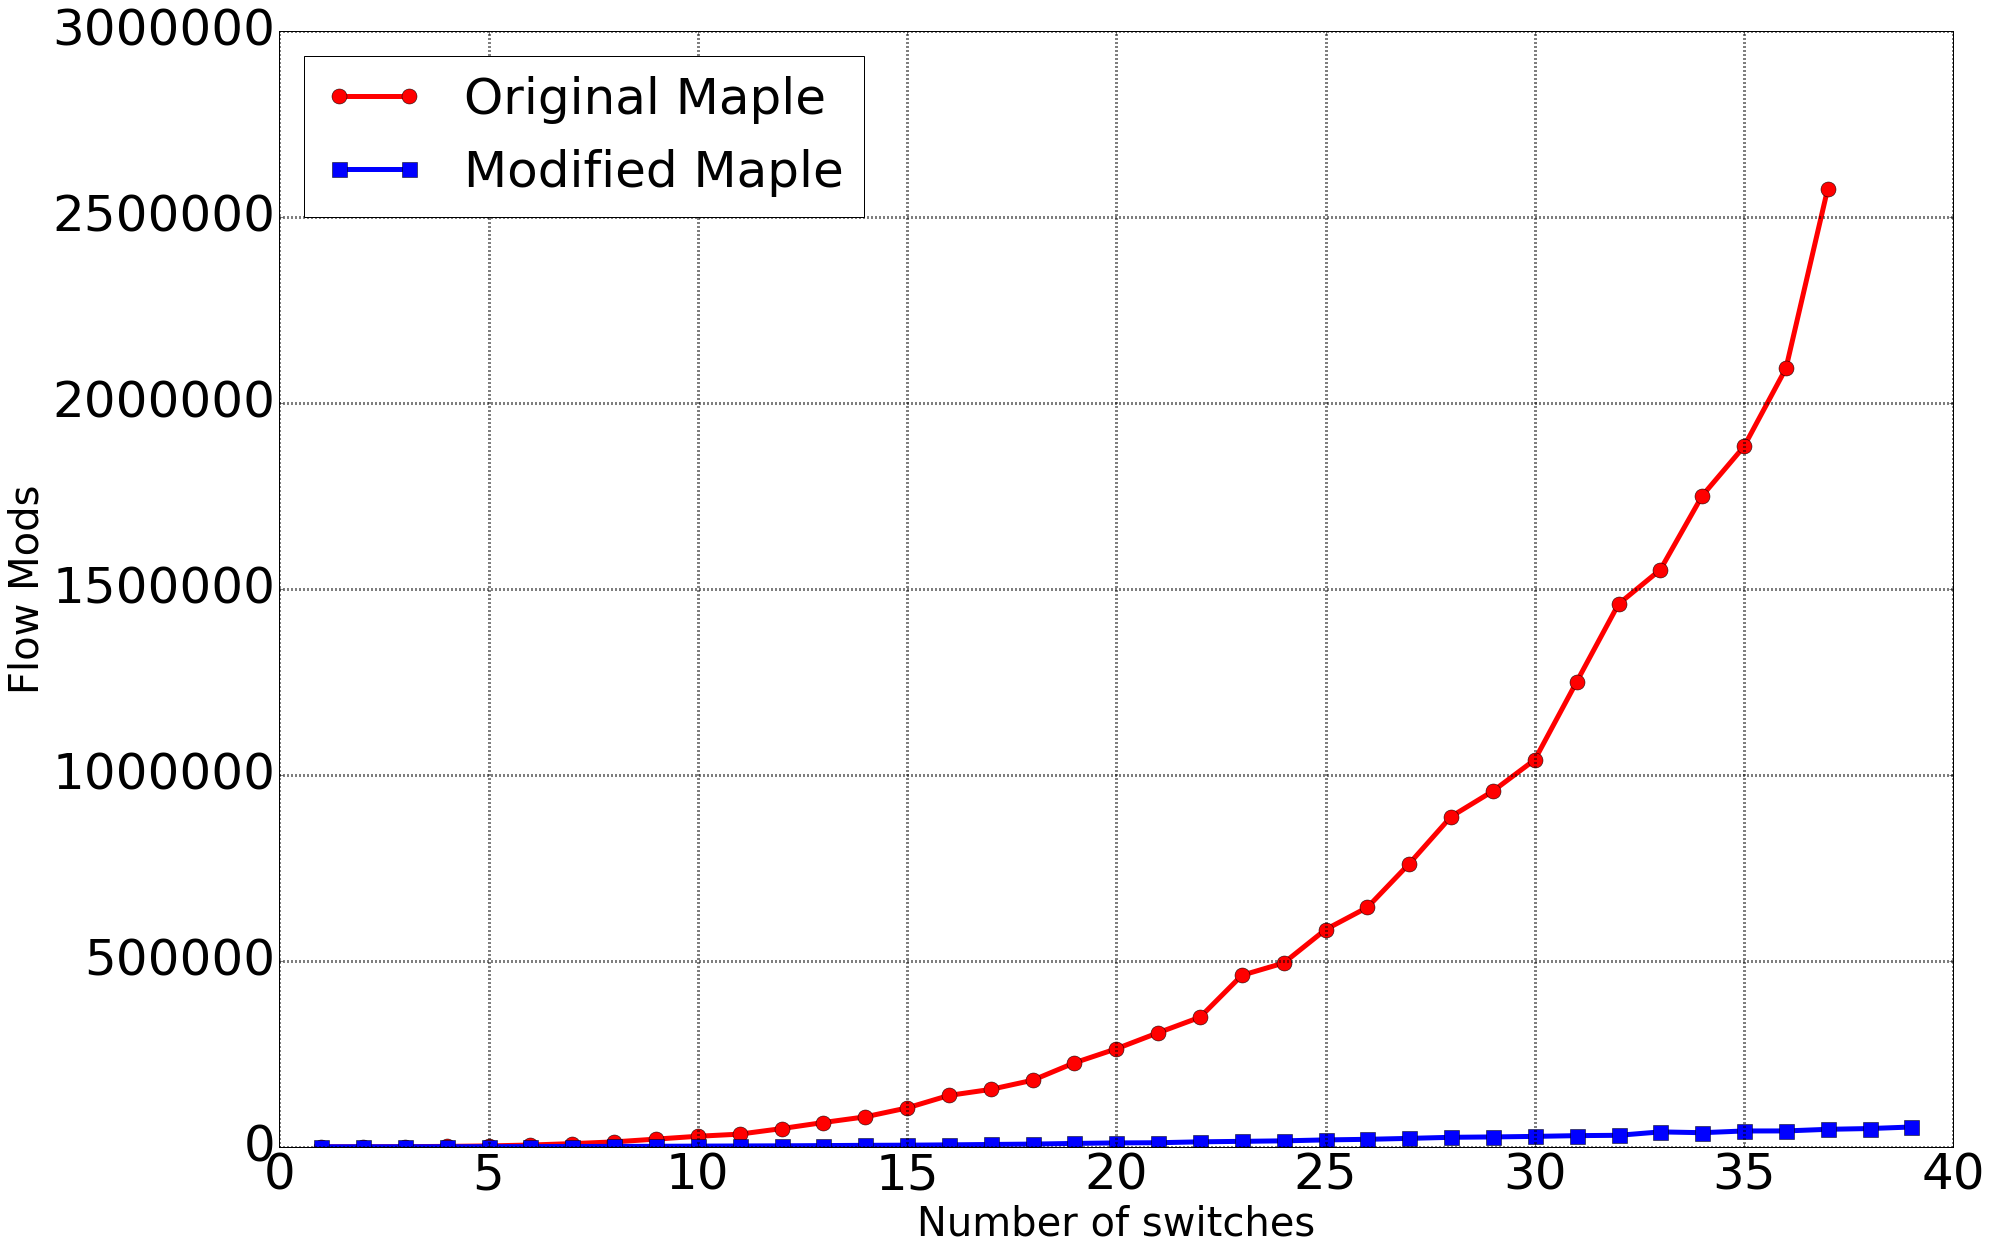

In [141]:
plt.figure(figsize=(30, 20))
plt.plot(n_old - 1, fm_old, color='r', marker='o', markersize=15, label="Original Maple", lw=5)
plt.plot(n_new - 1, fm_new, color='b', marker='s', markersize=15, label="Modified Maple",lw=5)
plt.legend(loc='upper left', prop={'size':50})
plt.grid(linewidth=3)
#plt.title("Flow mods messages", fontsize=40)
plt.xlabel("Number of switches", fontsize=40)
plt.ylabel("Flow Mods", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.savefig('FlowMod.png')
plt.show()

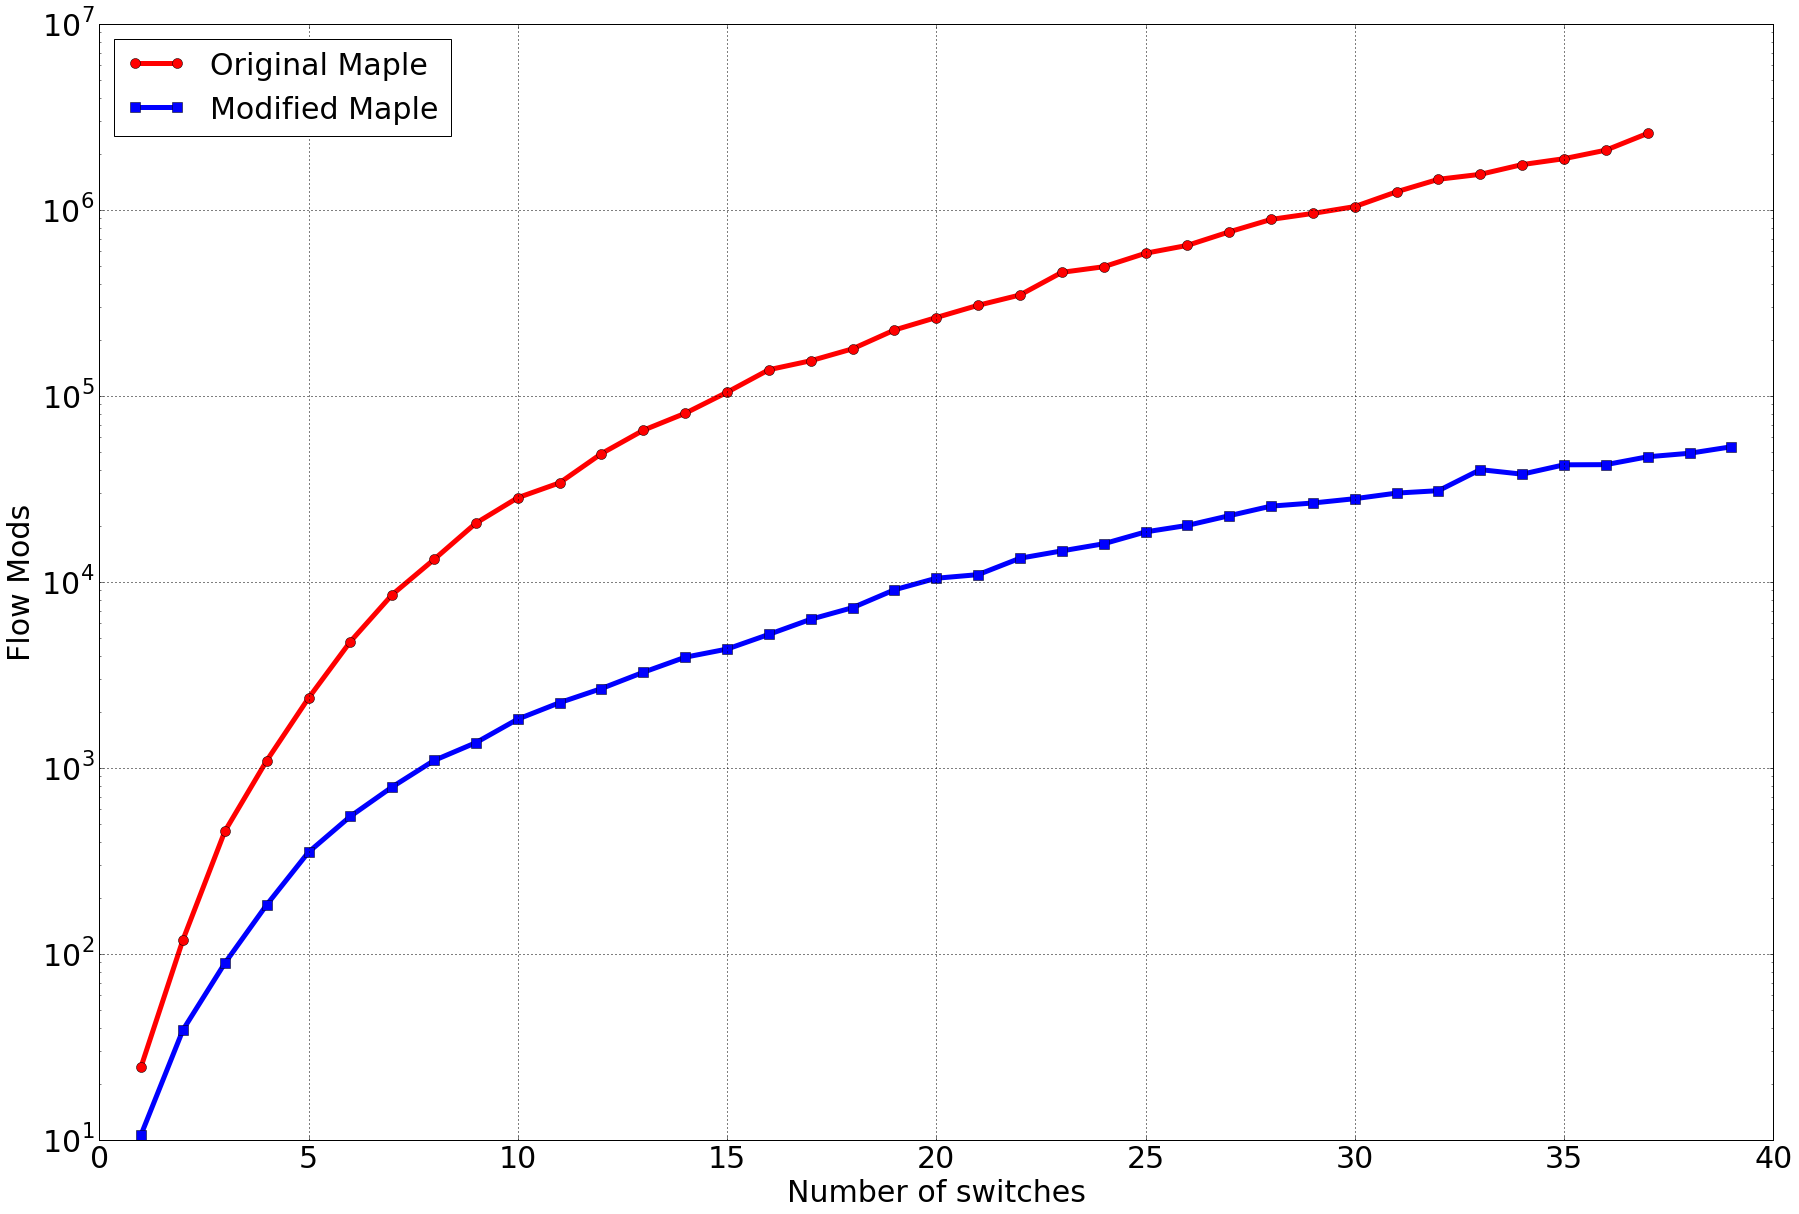

In [142]:
plt.figure(figsize=(30, 20))
plt.semilogy(n_old - 1, fm_old, color='r', marker='o', markersize=10, label="Original Maple", lw=5)
plt.semilogy(n_new - 1, fm_new, color='b', marker='s', markersize=10, label="Modified Maple",lw=5)
plt.legend(loc='upper left', prop={'size':30})
plt.grid(linewidth=1)
#plt.title("Flow mods messages", fontsize=30)
plt.xlabel("Number of switches", fontsize=30)
plt.ylabel("Flow Mods", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

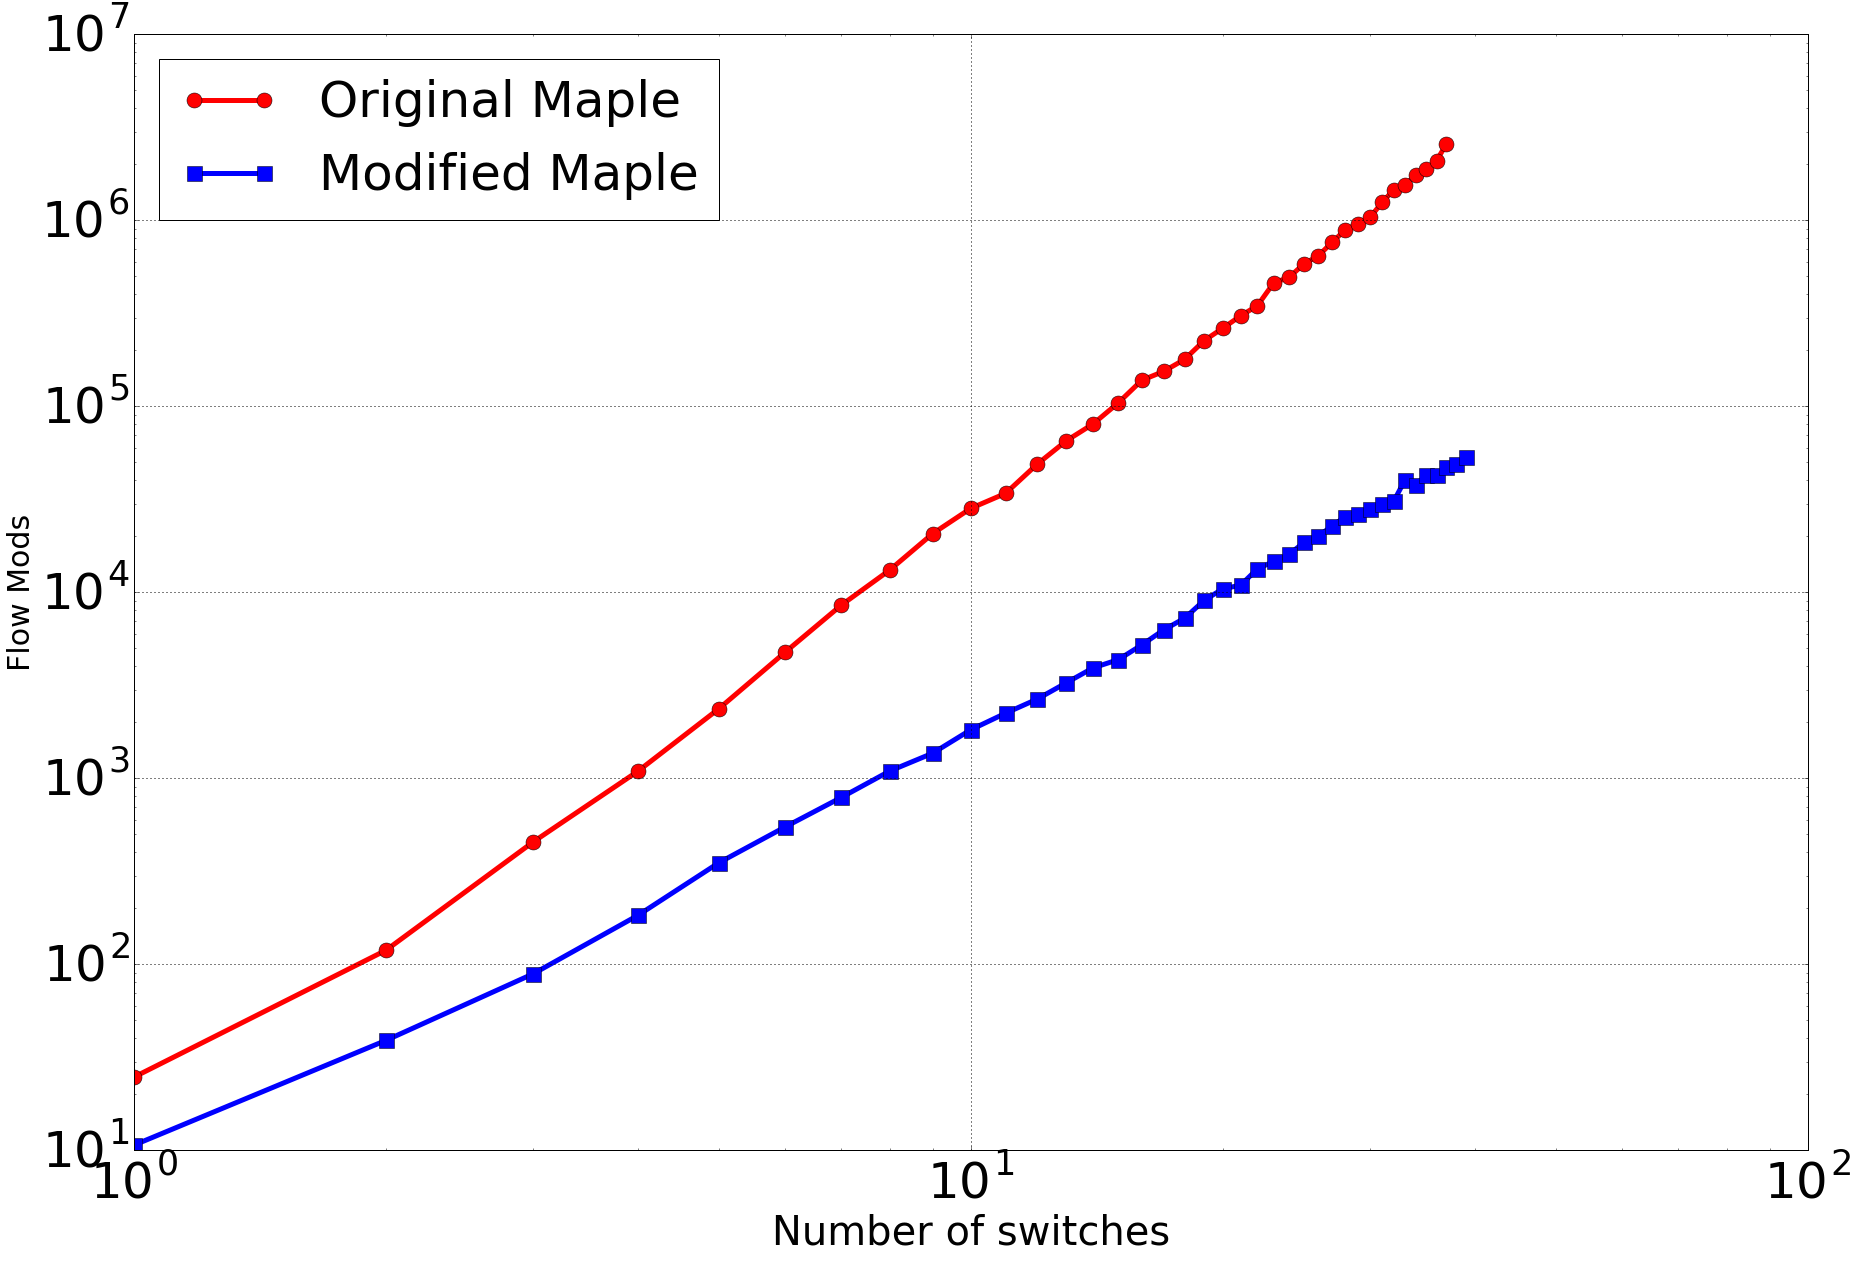

In [143]:
plt.figure(figsize=(30, 20))
plt.loglog(n_old - 1, fm_old, color='r', marker='o', markersize=15, label="Original Maple", lw=5)
plt.loglog(n_new - 1, fm_new, color='b', marker='s', markersize=15, label="Modified Maple",lw=5)
plt.legend(loc='upper left', prop={'size':50})
plt.grid(linewidth=1)
#plt.title("Flow mods messages", fontsize=40)
plt.xlabel("Number of switches", fontsize=40)
plt.ylabel("Flow Mods", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.savefig('FlowModloglog.png')
plt.show()

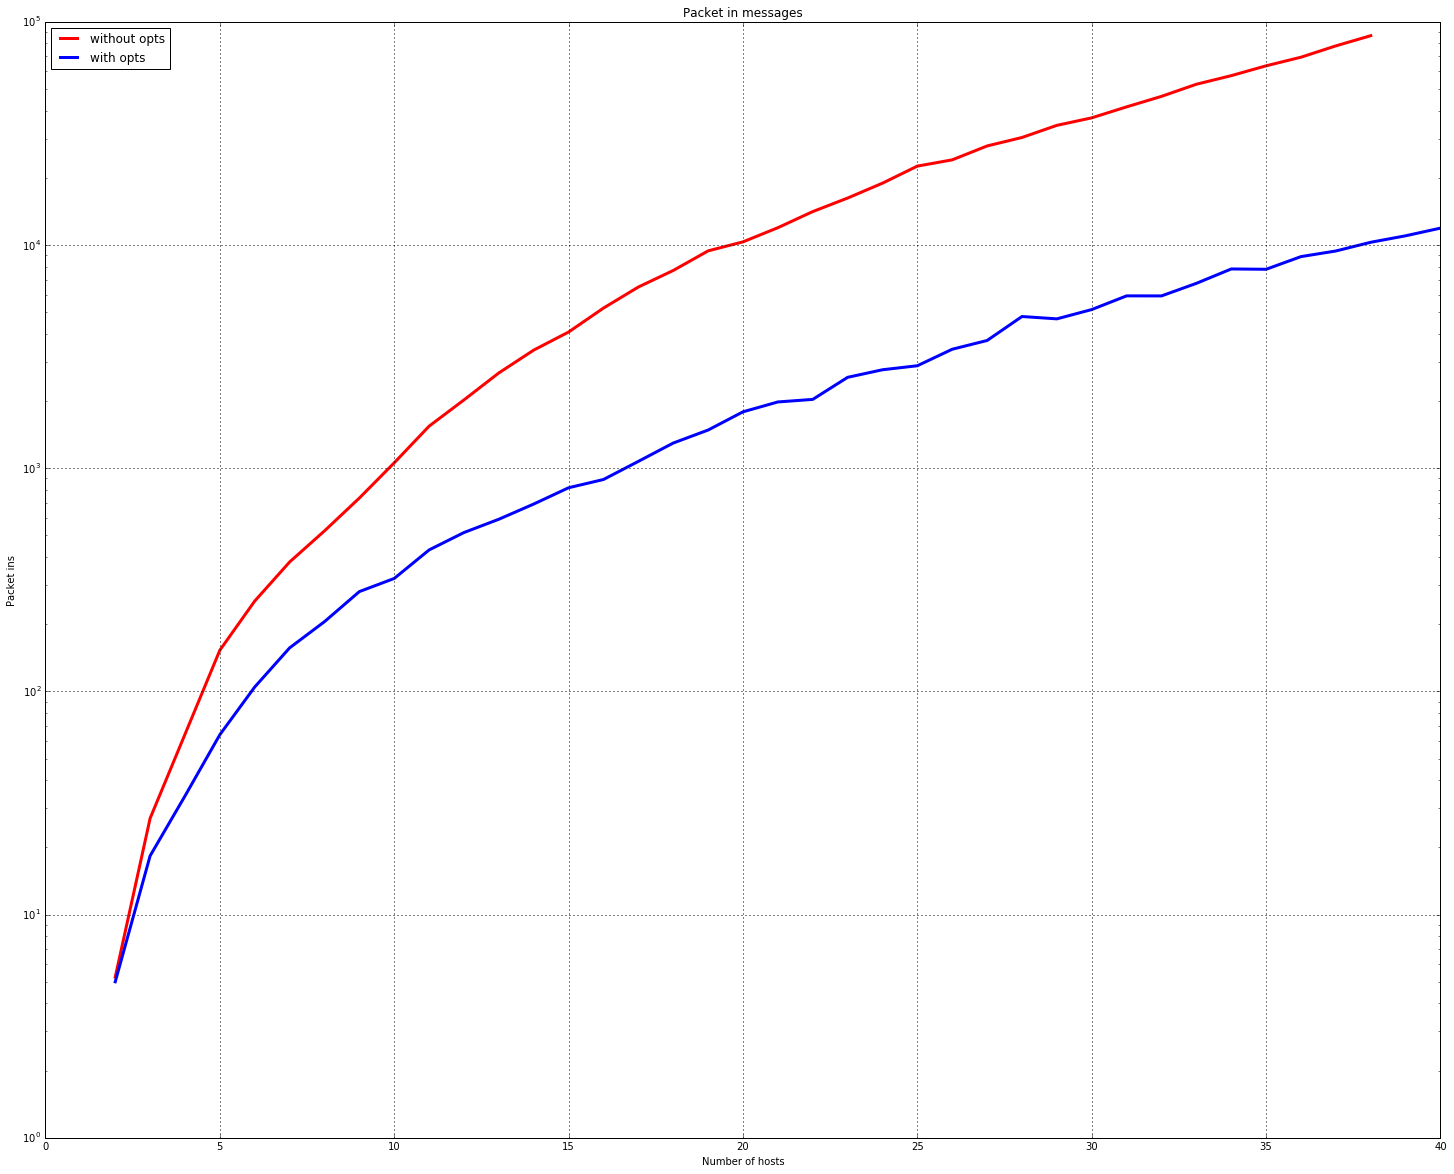

In [144]:
plt.figure(figsize=(25, 20))
plt.semilogy(n_old, pi_old, color='r', label="without opts", lw=3)
plt.semilogy(n_new, pi_new, color='b', label="with opts", lw=3)
plt.legend(loc='upper left')
plt.grid(linewidth=1)
plt.title("Packet in messages")
plt.xlabel("Number of hosts")
plt.ylabel("Packet ins")
plt.show()

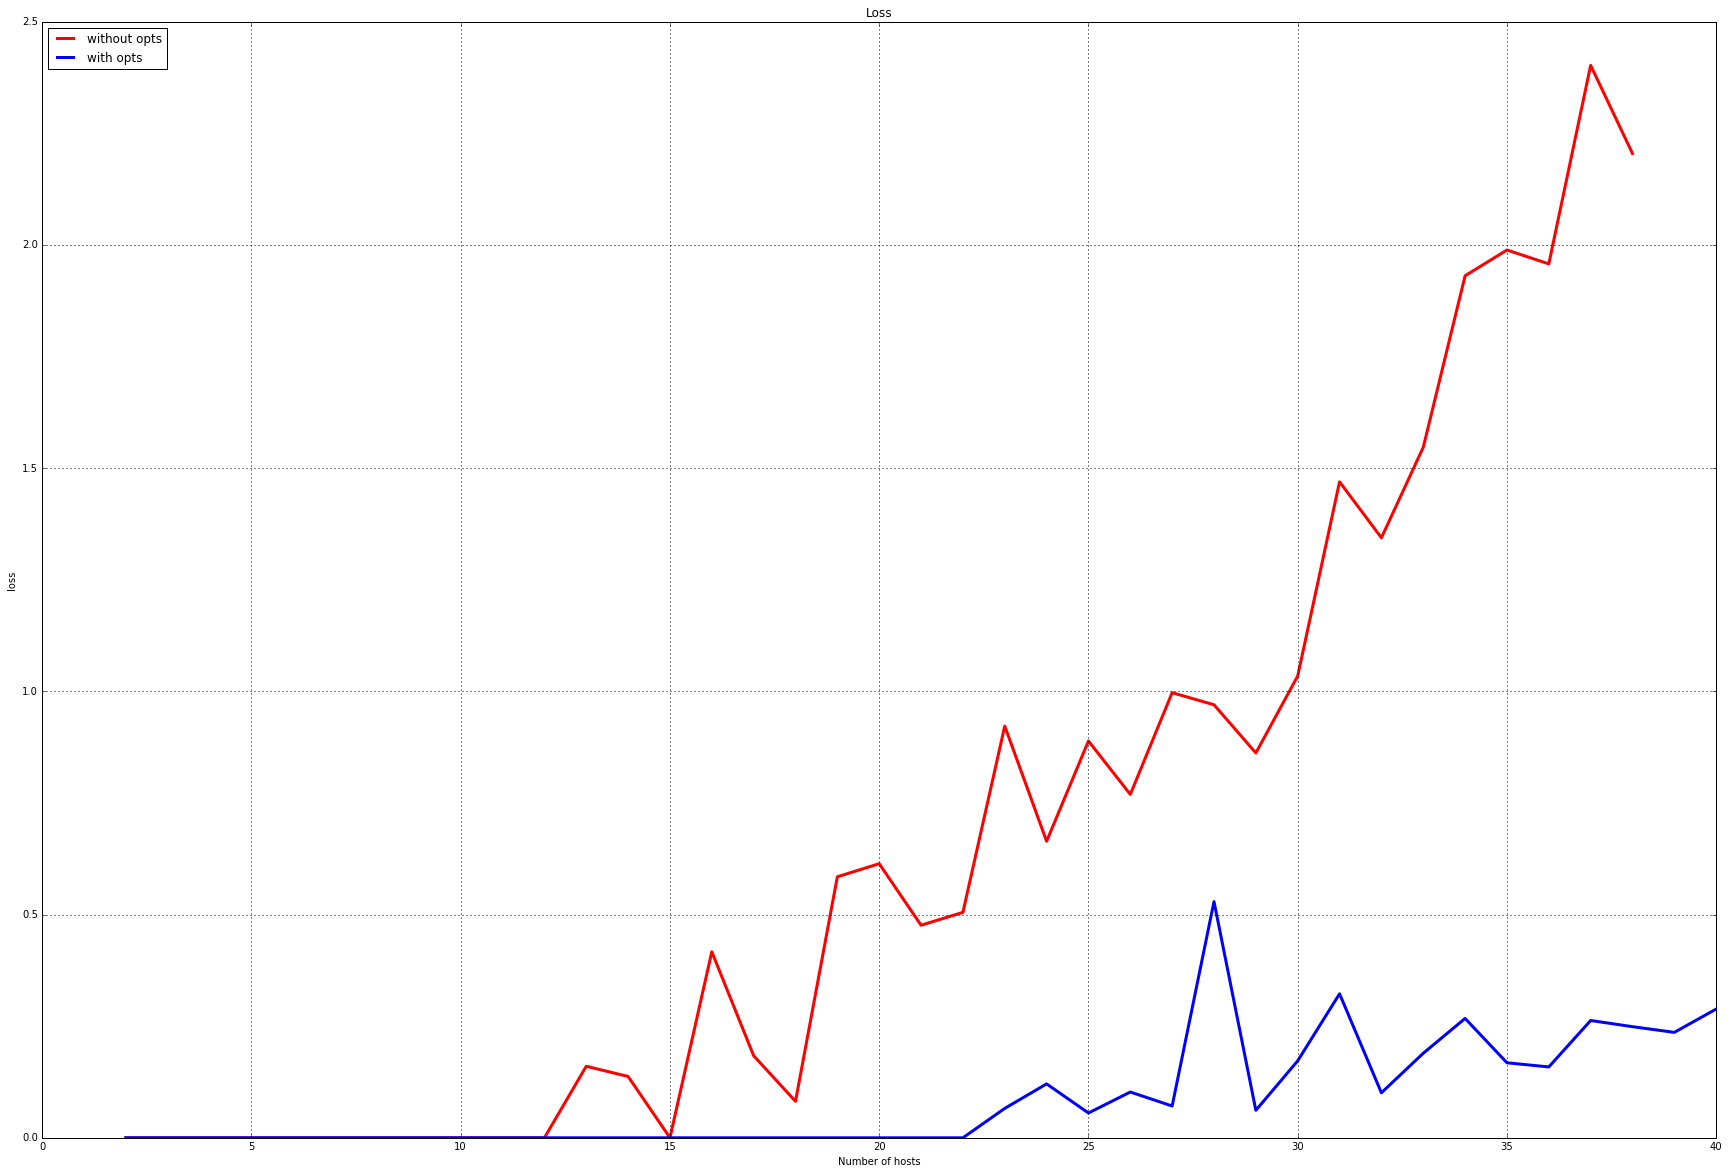

In [145]:
plt.figure(figsize=(30, 20))
plt.plot(n_old, loss_old, color='r', label="without opts", lw=3)
plt.plot(n_new, loss_new, color='b', label="with opts", lw=3)
plt.legend(loc='upper left')
plt.grid(linewidth=1)
plt.title("Loss")
plt.xlabel("Number of hosts")
plt.ylabel("loss")
plt.show()

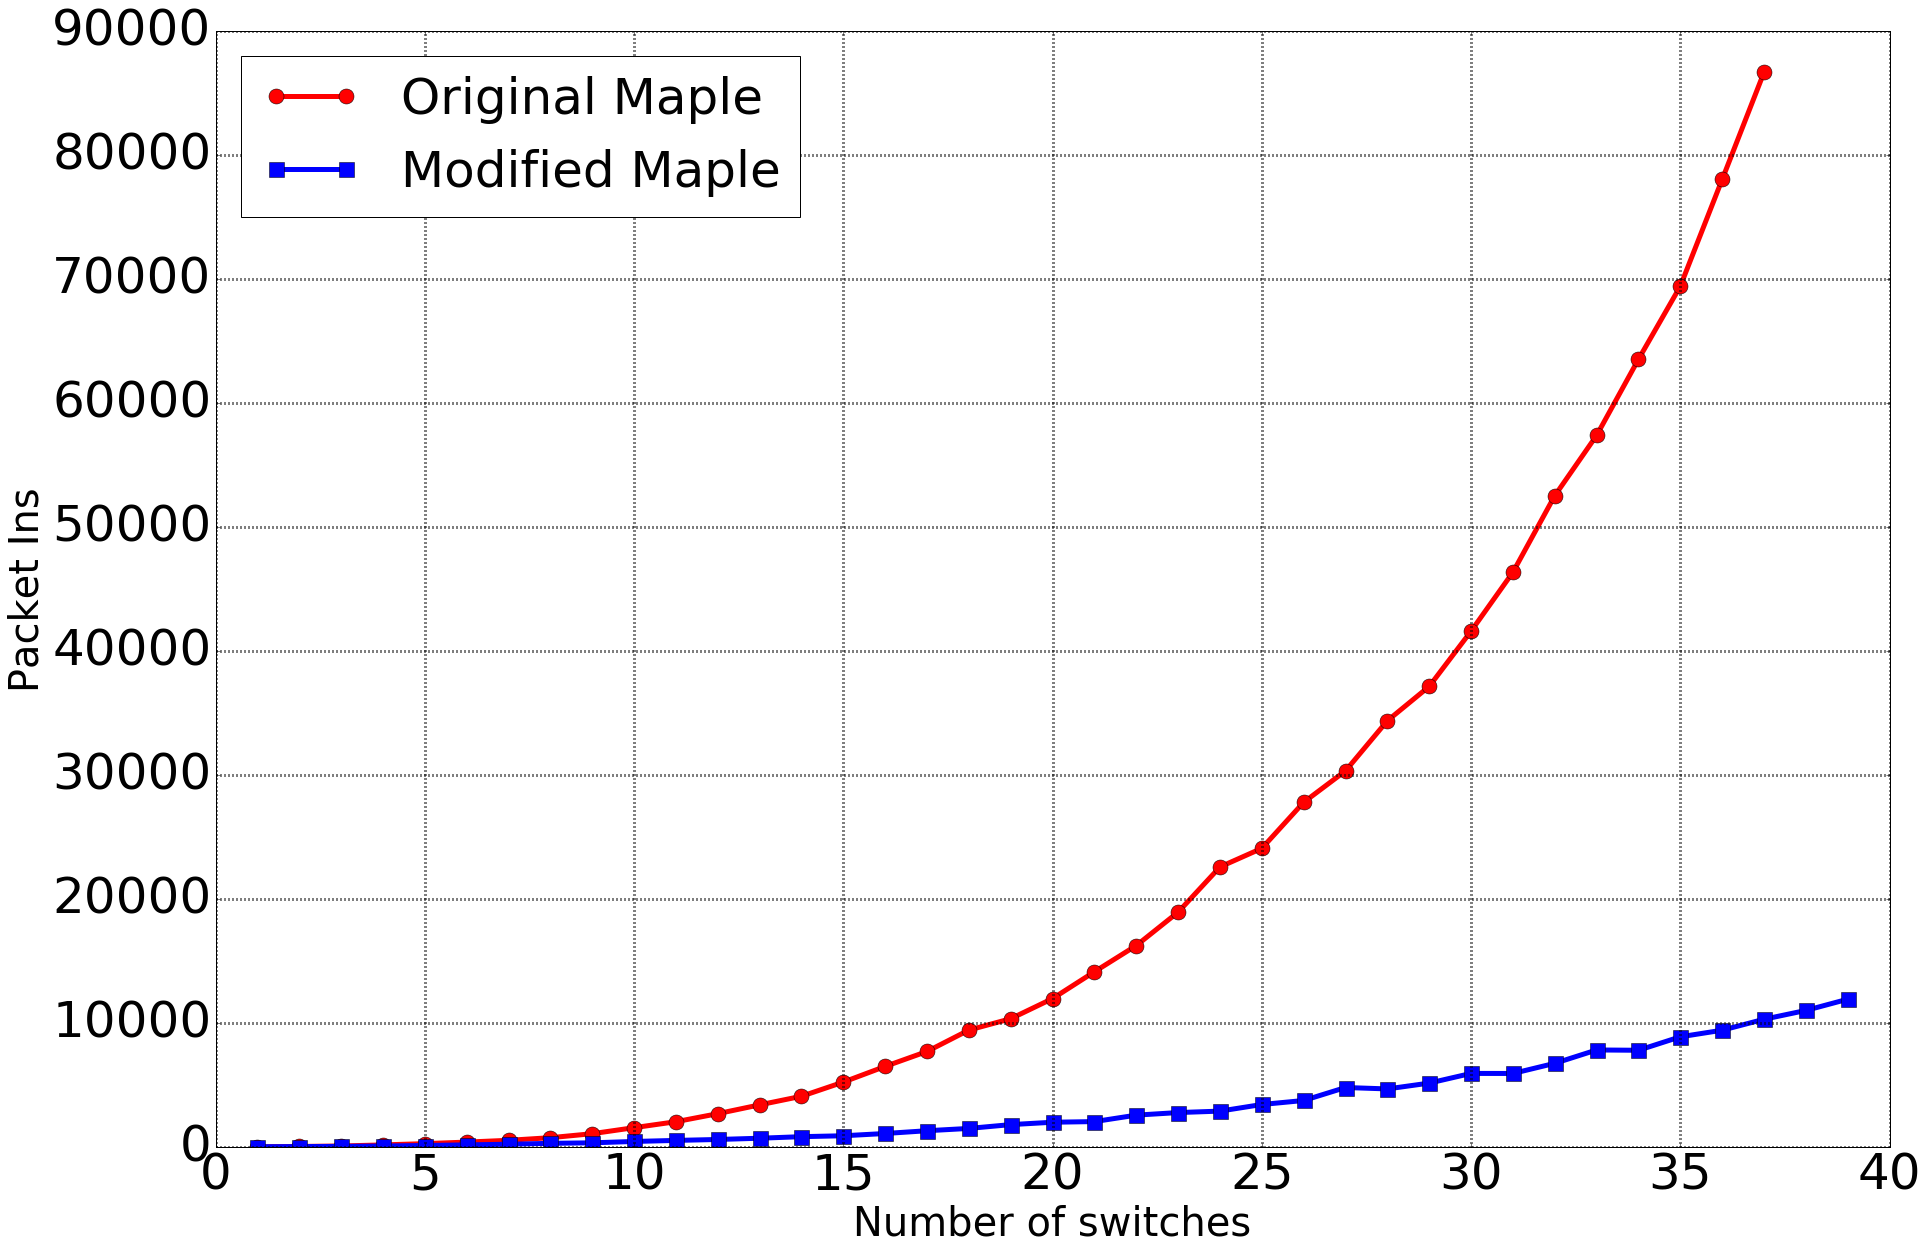

In [146]:
plt.figure(figsize=(30, 20))
plt.plot(n_old - 1, pi_old, color='r', marker='o', markersize=15, label="Original Maple", lw=5)
plt.plot(n_new - 1, pi_new, color='b', marker='s', markersize=15, label="Modified Maple",lw=5)
plt.legend(loc='upper left', prop={'size':50})
plt.grid(linewidth=3)
#plt.title("PacketIn messages", fontsize=30)
plt.xlabel("Number of switches", fontsize=40)
plt.ylabel("Packet Ins", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.savefig('PacketIn.png')
plt.show()

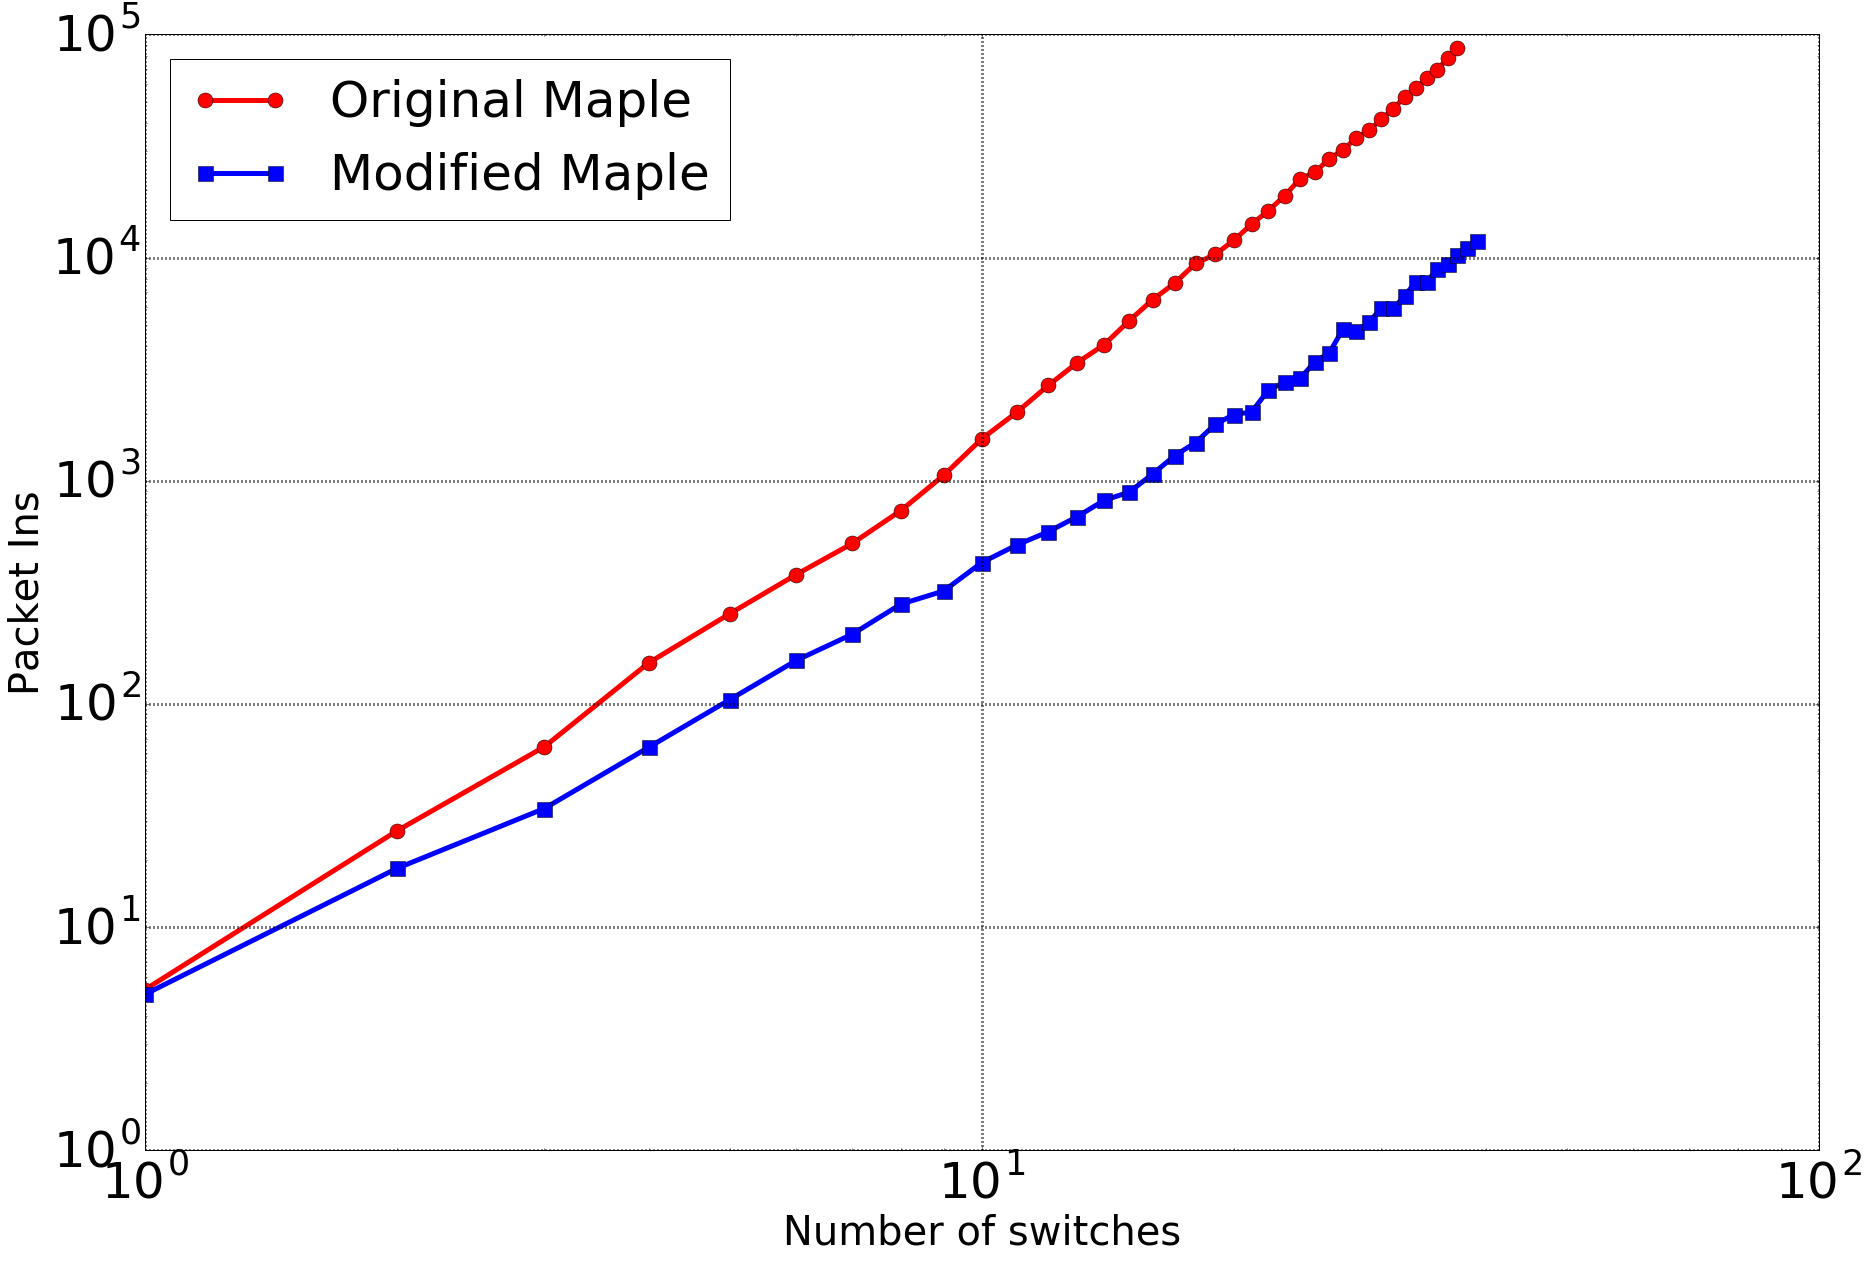

In [147]:
plt.figure(figsize=(30, 20))
plt.loglog(n_old - 1, pi_old, color='r', marker='o', markersize=15, label="Original Maple", lw=5)
plt.loglog(n_new - 1, pi_new, color='b', marker='s', markersize=15, label="Modified Maple",lw=5)
plt.legend(loc='upper left', prop={'size':50})
plt.grid(linewidth=3)
#plt.title("PacketIn messages", fontsize=30)
plt.xlabel("Number of switches", fontsize=40)
plt.ylabel("Packet Ins", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.savefig('PacketInloglog.png')
plt.show()